ÉTUDE DU MOUVEMENT DE KEPLER

Informations pratiques:
- 1 ua = distance Terre-Soleil
- Selon le SI, on a: 1 ua = 1.5 * 10^11 (m); M_soleil = 2 * 10^30 (kg); G = 6.67 * 10^-11 (m^3 kg^-1 s^-2)

Pistes de réflexion:
- Etude comparative des méthodes d’Euler et de Runge-Kutta
- Implémentation de méthodes alternatives (Euler-Richardson, Verlet)
- Vérification de la troisième loi de Kepler et de la loi des aires (appelée aussi « deuxième loi de Kepler »)

On a  𝑥′′(𝑡)+ 𝒢𝑀𝑥(𝑡)/[𝑥(𝑡)² +𝑦(𝑡)²]^(3/2) = 0 (1𝑎)
      𝑦′′(𝑡) + 𝒢𝑀𝑦(𝑡)/[𝑥(𝑡)² + 𝑦(𝑡)²]^(3/2) = 0 (1𝑏)

En posant u = 𝑥′ et v = 𝑦′ on a
    u′(𝑡) = - 𝒢𝑀𝑥(𝑡)/[𝑥(𝑡)² +𝑦(𝑡)²]^(3/2) (1𝑎)
    v′(𝑡) = - 𝒢𝑀𝑦(𝑡)/[𝑥(𝑡)² + 𝑦(𝑡)²]^(3/2) (1𝑏)
    𝑥′ = u (1c)
    𝑦′ = v (1d)
    
Donc les suites imbriquées sont:
    u_n+1 ← u_n - h𝒢𝑀𝑥(𝑡)/[𝑥(𝑡)² +𝑦(𝑡)²]^(3/2)
    v_n+1 ← v_n - h𝒢𝑀y(𝑡)/[𝑥(𝑡)² +𝑦(𝑡)²]^(3/2)
    x_n+1 ← x_n + hu
    y_n+1 ← y_n + hv

In [3]:
#IMPORTS
import numpy as np
import matplotlib.pyplot as plt

# définition des fonctions k1, l1, k2, l2 et g
def k1(x, y, G, M):
    return (-G*M*x)/np.power((x**2+y**2), 3/2)

def l1(x, y, G, M):
    return (-G*M*y)/np.power((x**2+y**2), 3/2)

def k2(u, v):
    return u

def l2(u, v):
    return v

# méthode d'Euler
def fct_Euler_2D(x0, y0, x_prime0, y_prime0, tmin, tmax, pas, K1, K2, L1, L2, G, M):
    """
    Implémente la méthode d'Euler pour un système d'équations différentielles en 2D.

    Arguments :
    - x0, y0, x_prime0, y_prime0 : conditions initiales (valeurs de x et y à t = tmin)
    - tmin : début de l'intervalle de temps
    - tmax : fin de l'intervalle de temps
    - pas : pas de discrétisation
    - K1 : fonction K1(t, x, y) définissant l'équation différentielle du/dt = K1
    - L1 : fonction L1(t, x, y) définissant l'équation différentielle dv/dt = L1
    - K2 : fonction K2(t, u, v) définissant l'équation différentielle dx/dt = K2
    - L2 : fonction L2(t, u, v) définissant l'équation différentielle dy/dt = L2

    Retourne :
    - x : tableau des valeurs de x(t)
    - y : tableau des valeurs de y(t)
    - t : tableau des instants de temps
    """
    t = np.arange(tmin,tmax+pas,pas)
    x = np.zeros(len(t))
    x[0] = x0
    y = np.zeros(len(t))
    y[0] = y0
    u = np.zeros(len(t))
    u[0] = x_prime0
    v = np.zeros(len(t))
    v[0] = y_prime0
    
    for k in range(1,len(t)):
        u[k] = u[k-1] + pas*K1(x[k-1],y[k-1], G, M)
        v[k] = v[k-1] + pas*L1(x[k-1],y[k-1], G, M)
        x[k] = x[k-1] + pas*K2(u[k-1],v[k-1])
        y[k] = y[k-1] + pas*L2(u[k-1],v[k-1])
        
    return x, y, t


0.0 11.5 0.5 0.0
-1.5791367041742974 11.5 0.5 0.115
-3.0407720593144054 11.163823868317776 0.484208632958257 0.23
-4.281730753058586 10.574366183894856 0.45380091236511294 0.3416382386831778
-5.259246251145433 9.838456087744126 0.41098360483452706 0.44738190052212634
-5.9829188720711866 9.050692223937574 0.35839114232307273 0.5457664613995676
-6.491237465701911 8.276612713179572 0.2985619536023609 0.6362733836389434
-6.830726786947854 7.553117919110351 0.23364957894534177 0.7190395107707391
-7.044166425416682 6.896273023791229 0.16534231107586322 0.7945706899618427
-7.1662708415383305 6.309486801112566 0.0949006468216964 0.863533420199755
-7.223414856409769 5.789513879341107 0.023237938406313094 0.9266282882108806
-7.234934289456997 5.330168805820603 -0.0489962101577846 0.9845234270042917
-7.214739811434869 4.9243836104987295 -0.12134555305235457 1.0378251150624977
-7.172747908240285 4.5652418812108815 -0.1934929511667033 1.0870689511674851
-7.116001984767433 4.246435789615751 -0.26522

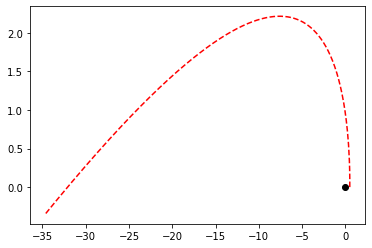

In [4]:
# paramètres et conditions initiales
from matplotlib import legend


M_soleil = 1
G_temp = 4*(np.pi)**2
t_min = 0.0
t_max = 15
h = 0.01
x0 = 0.5  # position astre initiale (x)
y0 = 0  # position astre initiale (y)
x_prime0 = 0  # vitesse astre initiale (x)
y_prime0 = 11.5  # vitesse astre initiale (y)
beta_RK = 0.5

u1 = x_prime0 + h*k1(x0,y0, G_temp, M_soleil)
v1 = y_prime0 + h*l1(x0,y0, G_temp, M_soleil)
x1 = x0 + h*k2(x_prime0,y_prime0)
y1 = y0 + h*l2(x_prime0,y_prime0)

# méthode d'Euler
# x0, y0, x_prime0, y_prime0, tmin, tmax, pas, beta, K1, L1, K2, L2
xEuler, yEuler, t = fct_Euler_2D(x0, y0, x_prime0, y_prime0, t_min, t_max, h, k1, k2, l1, l2, G_temp, M_soleil)

# méthode de Runge-Kutta d'ordre 2, conditions initiales différentes
t_min = 0.0
t_max = 15.0
h = 0.01
x0 = 0.5  # position astre initiale (x)
y0 = 0  # position astre initiale (y)
x_prime0 = -2.1  # vitesse astre initiale (x)
y_prime0 = 15.5  # vitesse astre initiale (y)

# Tracer les trajectoires
plt.figure()
plt.plot(xEuler, yEuler, label="Méthode d'Euler", linestyle="--", color="r")
# Ajouter le centre d'attraction (astre central)
plt.scatter(0, 0, color="black", marker="o", label="Centre d'attraction")

# Labels et légende
plt.xlabel("Position x")
plt.ylabel("Position y")
plt.title("Simulation de Kepler via EDO (Méthode d'Euler)")
plt.legend()
plt.grid()
plt.axis("equal")  # Pour conserver les proportions réelles

plt.show()